# Saving and restoring models

**checkpoints**, which is a format dependent on the code that created the model.  
**SavedModel**, which is a format independent of the code that created the model.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
!pip3 install matplotlib

    100% |████████████████████████████████| 14.3MB 308kB/s ta 0:00:01
    100% |████████████████████████████████| 112kB 533kB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 13.1MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
np.random.seed(101)
tf.set_random_seed(101)

y = mx + b

### Made up data

In [5]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1, 1, 10)

In [6]:
x_data

array([0.03279726, 1.25244628, 1.27917068, 2.67637665, 4.81499841,
       6.22334928, 6.28059911, 8.56500394, 9.33197661, 9.37987791])

In [7]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

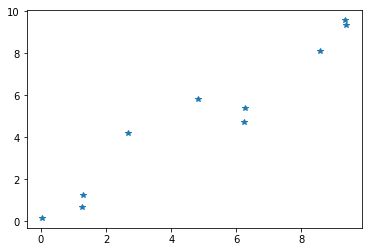

In [8]:
plt.plot(x_data,y_label,'*')

### Variable

In [9]:
np.random.rand(2)

array([0.68530633, 0.51786747])

In [10]:
m = tf.Variable(0.68)
b = tf.Variable(0.51)

In [11]:
# cost function
error = tf.reduce_mean(y_label - (m*x_data+b))

In [12]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [13]:
# init
init = tf.global_variables_initializer()

# Save the model

In [14]:
saver = tf.train.Saver()

Create session and run

In [15]:
with tf.Session() as sess:
    
    sess.run(init)
    
    epochs = 100
    
    for i in range(epochs):
        
        sess.run(train)

    # Fetch Back Results
    final_slope , final_intercept = sess.run([m,b])
    
    # ONCE YOU ARE DONE
    # GO AHEAD AND SAVE IT!
    # Make sure to provide a directory for it to make or go to. May get errors otherwise
    #saver.save(sess,'models/my_first_model.ckpt')
    saver.save(sess,'new_models/my_second_model.ckpt')

### Evaluate Results

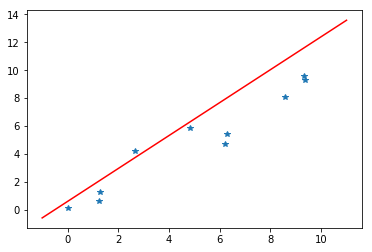

In [16]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')

# Loading a Model

In [17]:
with tf.Session() as sess:
    
    # Restore the model
    saver.restore(sess,'new_models/my_second_model.ckpt')
    

    # Fetch Back Results
    restored_slope , restored_intercept = sess.run([m,b])

INFO:tensorflow:Restoring parameters from new_models/my_second_model.ckpt


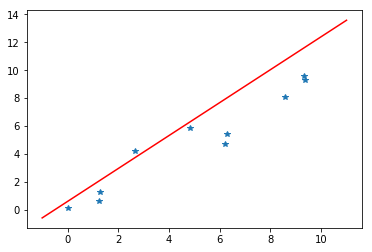

In [18]:
x_test = np.linspace(-1,11,10)
y_pred_plot = restored_slope*x_test + restored_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')